__Name/Section:__

A: Go, Ernesto II / S17

# k-Nearest Neighbor (kNN) exercise

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

In this exercise you will implement these steps and understand the basic classification pipeline, and cross-validation.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

In [3]:
# Run some setup code for this notebook.
import random
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
# Makes matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


this is jay

# Playing with a small dataset 



## Create a small dataset
Let's create a simple dataset and see how a kNN classifier will classify it. In this exercise, let's have two class labels 0 and 1, or y = {0,1}

Let's first create the X (features) of y=0. We can do this by randomly choosing datapoints with numpy's `np.random.randn function`:
```python
np.random.randn(rows,cols)*variance + mean
```
Find out more with `np.random.randn?`

In [6]:
# TODO : Create 10 entries (rows) with 2 features (columns: x and y coordinates) for y=0
# Set the mean to 3, and variance to 1.5
### START CODE HERE ###
X_train_zeros = np.random.randn(10,2)*1.5 + 3
### END CODE HERE ###

# TODO : Create 10 entries (rows) with 2 features (columns) for y=1
# Set the mean to 1, and variance to 1.5
### START CODE HERE ###
X_train_ones = np.random.randn(10,2)*1.5 + 1
### END CODE HERE ###

# Check the generated numbers
print("Class 0 \n" + str(X_train_zeros))
print("Class 1 \n" + str(X_train_ones))

Class 0 
[[4.21927611 4.86391093]
 [2.91749233 1.61459017]
 [0.27436359 2.00872978]
 [2.72837798 3.42774737]
 [5.13421562 3.58799314]
 [5.22201773 2.01834331]
 [1.66416363 4.92704273]
 [3.56160658 3.37308921]
 [1.19286373 4.71511559]
 [5.68939185 1.93783626]]
Class 1 
[[-0.56673776 -1.02360374]
 [ 1.60321113  1.14816553]
 [-0.18686818 -1.81044511]
 [ 1.07382398 -1.01560227]
 [ 4.0794942  -0.61127324]
 [-0.21703366 -1.41430675]
 [ 2.66898176  1.12814852]
 [-0.04986191 -0.39137586]
 [ 1.86011838  0.37888984]
 [-1.60226421  1.42546977]]


### Visualize
Plot the generated data in a chart

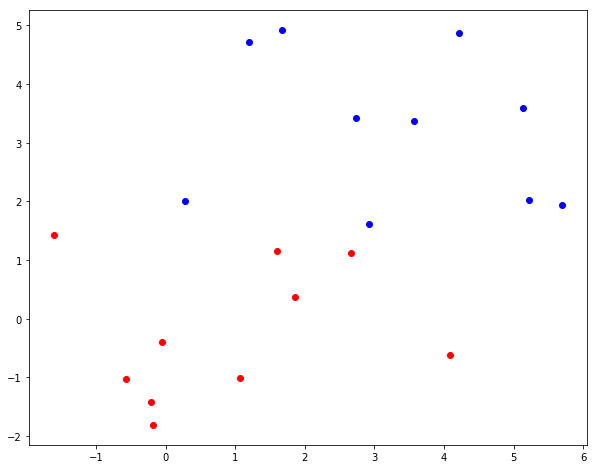

In [7]:
# Format: plt.plot(x, y, character/symbol)
plt.plot?

# X_train_zeros[:,col] gets all the rows and column col
# The 'bo' parameter marks these points as blue circles
plt.plot(X_train_zeros[:,0], X_train_zeros[:,1], 'bo')
# The 'ro' parameter marks these points as red circles
plt.plot(X_train_ones[:,0], X_train_ones[:,1], 'ro')

So far, our data D has been split to 2 classes. 

Let's collate them into one X_train, and create y_train for the labels

In [10]:
# TODO : Combine X_train_zeros with X_train_ones to a single matrix
# Tip : Use np.concatenate to combine the two matrices
### START CODE HERE ###
X_train = np.concatenate((X_train_zeros, X_train_ones))
### END CODE HERE ###

# Labels
# TODO : Create an array of 10 zeros for the first class y=0
# Tip : Instead of manually creating an array, use np.zeros
### START CODE HERE ###
y_train_zeros = np.zeros(10)
### END CODE HERE ###

# TODO : Create an array of 10 ones for the first class y=1
# Tip : Instead of manually creating an array, use np.ones
### START CODE HERE ###
y_train_ones = np.ones(10)
### END CODE HERE ###

# TODO : Combine y_train_zeros with y_train_ones to a single array
# Tip : Use np.concatenate to combine the two arrays
### START CODE HERE ###
y_train = np.concatenate((y_train_zeros, y_train_ones))
### END CODE HERE ###

print("Our data set:")
print("Features (X) \t\t Label (y)")
for i in range(len(y_train)):
    print(str(X_train[i]) + " " + str(y_train[i]))

Our data set:
Features (X) 		 Label (y)
[4.21927611 4.86391093] 0.0
[2.91749233 1.61459017] 0.0
[0.27436359 2.00872978] 0.0
[2.72837798 3.42774737] 0.0
[5.13421562 3.58799314] 0.0
[5.22201773 2.01834331] 0.0
[1.66416363 4.92704273] 0.0
[3.56160658 3.37308921] 0.0
[1.19286373 4.71511559] 0.0
[5.68939185 1.93783626] 0.0
[-0.56673776 -1.02360374] 1.0
[1.60321113 1.14816553] 1.0
[-0.18686818 -1.81044511] 1.0
[ 1.07382398 -1.01560227] 1.0
[ 4.0794942  -0.61127324] 1.0
[-0.21703366 -1.41430675] 1.0
[2.66898176 1.12814852] 1.0
[-0.04986191 -0.39137586] 1.0
[1.86011838 0.37888984] 1.0
[-1.60226421  1.42546977] 1.0


__Your output should look like this:__
```
Our data set:
    Features (X) 		 Label (y)
[ 2.10736448  4.38938532] 0.0
[ 4.63171067  7.15449636] 0.0
[ 2.80923301  2.80047896] 0.0
...
[ 4.23634568  2.21686253] 1.0
[-0.5704331  1.0972354] 1.0
[-1.4629462   1.00977947] 1.0
```

### Create a test case
Let's add in a single test case to see how it will be classified by kNN

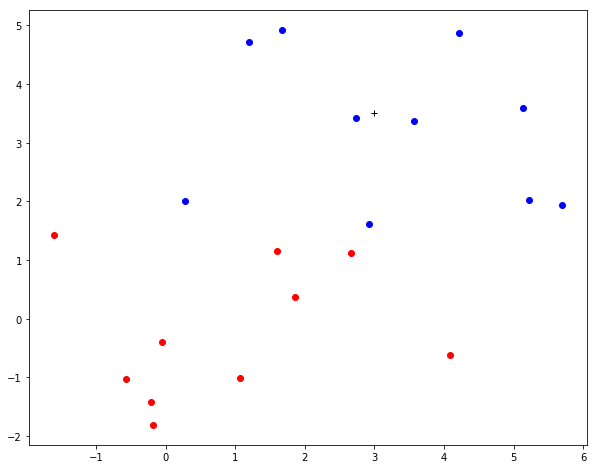

In [11]:
# New test case, see what will happen when you change this
X_test = np.array([[3,3.5]])
# There's a reason why this is an array inside an array. Each data 
# point is represented by an array (currently a array of length 2).
# Right now, there is only test data, but soon we many have more than 
# one.

# Plot the original
# TODO : plot the data from y=0 with blue circles
### START CODE HERE ###
plt.plot(X_train_zeros[:,0], X_train_zeros[:,1], 'bo')
### END CODE HERE ###

# TODO : plot the data from y=1 with red circles
### START CODE HERE ###
plt.plot(X_train_ones[:,0], X_train_ones[:,1], 'ro')
### END CODE HERE ###

# plot the test case in the figure (it should appear as a black plus sign)
# TODO : plot the test data with a black plus
### START CODE HERE ###
plt.plot(X_test[:,0], X_test[:,1], 'k+')
### END CODE HERE ###

kNN gets the k nearest data points of the test case. Let's envision which nearby data points will be the nearest to our test case.

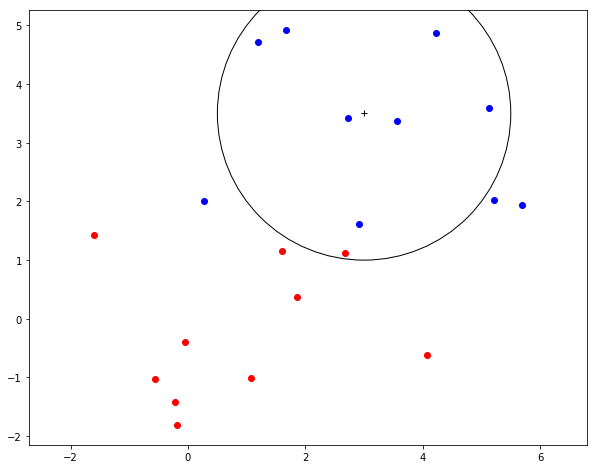

In [16]:
# Usual plots
# TODO : Plot the y=0 data, y=1 data, and the test data
### START CODE HERE ###
plt.plot(X_train_zeros[:,0], X_train_zeros[:,1], 'bo')
plt.plot(X_train_ones[:,0], X_train_ones[:,1], 'ro')
plt.plot(X_test[:,0], X_test[:,1], 'k+')
### END CODE HERE ###

# TODO : Place in the radius/distance of the circle
### START CODE HERE ###
radius = 2.5
### END CODE HERE ###

circle= plt.Circle((X_test[:,0], X_test[:,1]), radius, color='k', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.axis('equal')
ax.add_artist(circle)

## Question: 

__Adjust the radius until it has more than 1 data point. How will you label the new test data?__

A: The closest data point is blue so 0

__How will you label it if the circle fits two data points -- one from each class?__

A: Label it based on the closer one which is blue so 0

## Using scikit to create a k neighbors classifier

Now, we'll use scikit learn's KNeighbors classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize our classifier as knn
model = KNeighborsClassifier()

# Train the model 
model.fit(X_train, y_train)

# Test the model
model.predict(X_test)

array([0.])

The output should be the label of the data point nearest the test data. If the closest data point is blue it should say 0, and 1 if red.

## k Neighbors
We could also get the k nearest neighbors (not just the label)

In [21]:
model.kneighbors(X_test)

(array([[0.28106755, 0.57576757, 1.82944999, 1.88721428, 1.95471476]]),
 array([[3, 7, 0, 1, 6]]))

In [22]:
neighbors = 5
# TODO : Use kneighbors to get the most similar instances
### START CODE HERE ###
distances, data_index = model.kneighbors(X_test)
### END CODE HERE ###

distances = np.squeeze(distances) # just some trivial processing...
data_index = np.squeeze(data_index) # just some trivial processing...

print("The " + str(neighbors) + " nearest neighbors:")
for i in range(neighbors):
    print(str(i+1) + ". " + str(X_train[data_index[i]]) + "\t dist: "+ str(distances[i]))

The 5 nearest neighbors:
1. [2.72837798 3.42774737]	 dist: 0.2810675478704566
2. [3.56160658 3.37308921]	 dist: 0.5757675698763188
3. [4.21927611 4.86391093]	 dist: 1.8294499871120387
4. [2.91749233 1.61459017]	 dist: 1.8872142804280334
5. [1.66416363 4.92704273]	 dist: 1.9547147578398085


__Your output should look like this:__
```
The 5 nearest neighbors:
1. [ 3.53308273  3.67087895]	 dist: 0.559800686629
2. [ 2.80923301  2.80047896]	 dist: 0.725066710211
3. [ 2.25856168  2.97214525]	 dist: 0.910143626575
4. [ 3.99191562  2.99839246]	 dist: 1.11153349516
5. [ 3.24464637  2.28448593]	 dist: 1.23988963153
```

Let's check the labels of the k nearest neighbors

In [23]:
y_train[data_index]
# We can place in an array as the indices to our array

array([0., 0., 0., 0., 0.])

## Hyperparameter k

By now, you would have noticed that the value of *k* will affect the result the result of the classifier. Choosing a good *k* is important, and we can do sample runs to see which *k* works best for us.

*Hyperparameters* like *k* affect how the model learns, and are usually "set" before modelling begins. They are different from regular *parameters* in a model. They are normally considered "higher level" because they also help estimate model *paramters*. *Parameters* can be estimated by some analytic solution based on the data, while *hyperparameters* can not. Since knn is non-parametric, we haven't encountered any *parameters* yet.

In sklearn's KNeighborsClassifier, we can control the value of *k*, too.

array([0.])

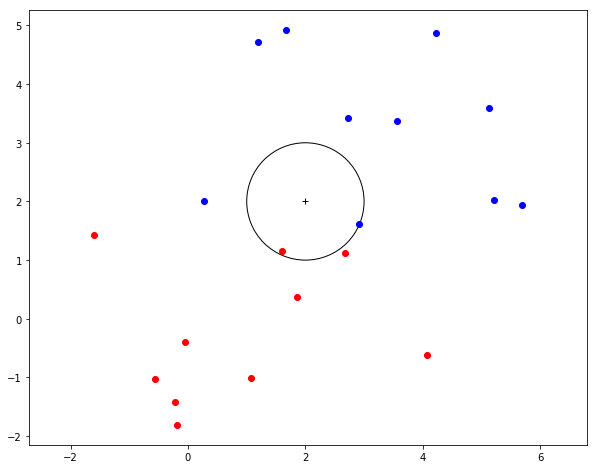

In [40]:
# You can change the test data to get a more conflicting labels in the neighbors
X_test=[[2,2]] 

# TODO : Add in the parameter for KNeighborsClassifier so that 
# it will choose 5 neighbors
### START CODE HERE ###
plt.plot(X_train_zeros[:,0], X_train_zeros[:,1], 'bo')
plt.plot(X_train_ones[:,0], X_train_ones[:,1], 'ro')
plt.plot(2, 2, 'k+')
radius = 1
circle= plt.Circle((2, 2), radius, color='k', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.axis('equal')
ax.add_artist(circle)


model = KNeighborsClassifier(20)
### END CODE HERE ###

# TODO : Train the model with the train data
### START CODE HERE ###
model.fit(X_train, y_train)
### END CODE HERE ###

# TODO : Test the model with the test data
### START CODE HERE ###
model.predict(X_test)
### END CODE HERE ###

## Questions:

__How is the label predicted when k is more 1?__

A: when there is more close neighbors

__What is the effect when you set the neighbors to 1?__

A: it gets the nearest neighbor

__What is the effect when you set the neighbors to 20?__

A: it becomes 0 from one because there are more 0 neighbors now

### Test Data
So far, we only have one test case. But we can test more than one sample data at a time, we just need to populate more samples in our X_test.

In [41]:
# You may change this
X_test = [[0,0],[1,1],[2,2],[3,3],[4,4]]

In [42]:
model.predict(X_test)

array([0., 0., 0., 0., 0.])

The output should be an array with n elements, where n is the size of X_test. The predictions will come in the same order.

## Evaluating the performance

In reality, our validation/test data will have proper labels/ground truths to compare our model's predictions with.

In [51]:
X_test = [[0,0],[1,1],[2,2],[3,3],[4,4]]
y_test = [    1,    1,    1,    0,   0] 

In [64]:
# Assign the predictions to y_pred
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

# Print out the performance metrics given the actual results vs the predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.00      0.00      0.00         3

   micro avg       0.40      0.40      0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



### Split data set
We don't need to manually split our training data from test data. Most of the time, manually splitting your data will be a source of partiality because you may un/consciously be choosing "good" or "easy-to-predict" data for the model to predict.

sklearn also has a module that allows us to easily split our data intro training and testing data. 

In [52]:
# TODO : Let's first combine X_train and X_test into a single X
### START CODE HERE ###
X = np.concatenate((X_train, X_test))
### END CODE HERE ###

# TODO : Let's first combine y_train and y_test into a single y
### START CODE HERE ###
y = np.concatenate((y_train, y_test))
### END CODE HERE ###

Use `train_test_split` to split our train from the test data. Make the test size 33% of the entire data.

In [61]:
from sklearn.model_selection import train_test_split

# We are going to reuse the variables here...
# TODO : Call train_test_split
### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
### END CODE HERE ###

print("X train: \n"+ str(X_train))
print("y train: \n"+ str(y_train))
print("X test: \n"+ str(X_test))
print("y test: \n"+ str(y_test))

X train: 
[[ 2.72837798  3.42774737]
 [ 3.56160658  3.37308921]
 [ 0.27436359  2.00872978]
 [ 2.66898176  1.12814852]
 [-0.04986191 -0.39137586]
 [ 1.07382398 -1.01560227]
 [-0.21703366 -1.41430675]
 [ 2.          2.        ]
 [ 2.91749233  1.61459017]
 [ 1.          1.        ]
 [-1.60226421  1.42546977]
 [-0.18686818 -1.81044511]
 [-0.56673776 -1.02360374]
 [ 5.22201773  2.01834331]
 [ 0.          0.        ]
 [ 4.0794942  -0.61127324]]
y train: 
[0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
X test: 
[[4.21927611 4.86391093]
 [1.60321113 1.14816553]
 [5.13421562 3.58799314]
 [1.66416363 4.92704273]
 [4.         4.        ]
 [5.68939185 1.93783626]
 [1.19286373 4.71511559]
 [1.86011838 0.37888984]
 [3.         3.        ]]
y test: 
[0. 1. 0. 0. 0. 0. 0. 1. 0.]


## Question:

__If you run the previous cell ang call `train_test_split` again, is it possible to have a different train and test set?__

A: Yes, but it will not mix up the train and test

And run do modelling like normal

In [68]:
# TODO : Create a knn classifier with a k of 3
### START CODE HERE ###
model = KNeighborsClassifier(3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
### END CODE HERE ###

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



Do you think we will come up with a different result if we had a different train and test set?

## Cross validation
Cross validation can be used to decrease the randomness in performance metrics solely because of the test data. 

__What does cross validation do?__
Cross validation is a kind of splitting similar to what we did in the cells before. But it does multiple splits, so cross val will give us *k*   train and test data. It does in such a way that each data point will eventually become a validation data.

> The *k* in *k*-fold cross validation is different from *k* nearest neighbors

Cross validation is an alternative to split testing where we never shuffle train and test together in further experiments. It is a good option if you have few data points, and you cannot afford to lose any data as test data.

__Determining hyperparameters.__ Validation is also a way for us to determine a good value for our *k* in k-nearest neighbors. Instead of blindly choosing our hyperparameter, we will do multiple experiments using cross validation to see which one will give us the best results.

> You may have heard of *validation* and *test* data before. For now, we will treat them similarly. But they are two different things.

`cross_val_predict` does the data splitting, training, and cross-validation. Try getting the predictions using a *k* of 10.

In [69]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

k = 10
# TODO : get the predictions using cross_val_predict
### START CODE HERE ###
predictions = cross_val_predict(model, X, y, cv=k)
### END CODE HERE ###

# TODO : print the classification report
### START CODE HERE ###
print(metrics.classification_report(y, predictions))
### END CODE HERE ###


              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.87      1.00      0.93        13

   micro avg       0.92      0.92      0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



__The result should look something like this :__
```
              precision    recall  f1-score   support

        0.0       0.73      0.92      0.81        12
        1.0       0.90      0.69      0.78        13

avg / total       0.82      0.80      0.80        25
```

In [72]:
# See the scores per fold (experiment)
scores = cross_val_score(model, X, y, cv=k)
print("Scores per fold :\n" + str(scores))
print("Average accuracy : " + str(np.sum(scores)/len(scores)))

Scores per fold :
[0.75 0.75 1.   1.   1.   1.   1.   1.   1.   1.  ]
Average accuracy : 0.95


__The result should look something like this :__
```
Scores per fold :
[ 1.    0.75  0.    1.    0.5   1.    1.    1.    1.    1.  ]
Average accuracy : 0.825
```

## <center>fin</center>